In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint

In [3]:
#
# Matplotlib colors map
#

from matplotlib.colors import ListedColormap

ALIVE=[.9, .7, .8]
DEAD=[.1,.3,.2]

cmap = ListedColormap([ALIVE, DEAD])

# Use with
# plt.matshow(g,cmap=cmap)

In [4]:
#
# Game of life logic
#

import copy

def hash_2d_array(array):
    # Convert each row to a tuple and then the whole array to a tuple of tuples
    array_tuple = tuple(tuple(row) for row in array)
    return hash(array_tuple)

def init_game(D: int):
    g = [[randint(0,1) for _ in range(D)] for _ in range(D)]
    return g, set()
    

def check_loop(g, memory):
    hash = hash_2d_array(g)

    if hash in memory:
        return True

    memory.add(hash)
    return False

def gol(g):
    h = copy.deepcopy(g)
    D = len(g)

    for y, line in enumerate(g):
        for x, val in enumerate(line):
            alive_neighbors = 0

            for dy in range(-1, 2):
                for dx in range(-1, 2):
                    alive_neighbors += g[(y+dy)%D][(x+dx)%D]
            alive_neighbors -= val
            h[y][x] = 1 if (val == 0 and alive_neighbors == 3) or (val == 1 and (alive_neighbors == 2 or alive_neighbors == 3)) else 0
    return h

In [ ]:
#
# Game loop v1
#

import matplotlib.pylab as plt
import time
from IPython import display
%matplotlib inline

D = 10
g, memory = init_game(D)

plt.matshow(g,cmap=cmap)

is_loop = False
while not is_loop:
    try:
        g = gol(g)
        is_loop = check_loop(g, memory)

        plt.matshow(g,cmap=cmap)

        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
    except KeyboardInterrupt:
        break

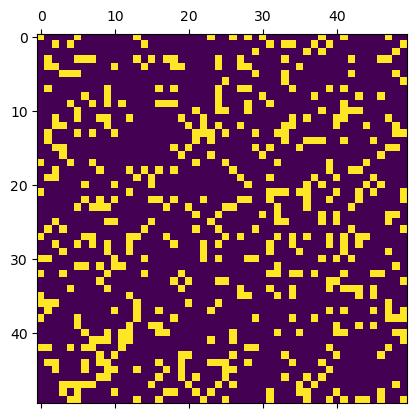

In [6]:
################################################################################
# conway.py
#
# Author: electronut.in
# 
# Description:
#
# A simple Python/matplotlib implementation of Conway's Game of Life.
################################################################################

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

N = 50
ON = 255
OFF = 0
vals = [ON, OFF]

# populate grid with random on/off - more off than on
grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(data):
  print("update")
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if grid[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50, save_count=50)
plt.show()

